In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def three_config_barplot(file_mm,file_mo,file_mmo,metric,fig_name):
    df_summary_mm = pd.read_csv(file_mm)
    df_summary_mo = pd.read_csv(file_mo)
    df_summary_mmo = pd.read_csv(file_mmo)
    #print(df_summary_mm[metric])
    acc_mm = df_summary_mm[metric].to_numpy()
    acc_mo = df_summary_mo[metric].to_numpy()
    acc_mmo = df_summary_mmo[metric].to_numpy()
    mean_mm = acc_mm.mean()
    mean_mo = acc_mo.mean()
    mean_mmo = acc_mmo.mean()
    std_mm = acc_mm.std()
    std_mo = acc_mo.std()
    std_mmo = acc_mmo.std()
    collective_se_metric_mean= [mean_mmo,mean_mm,mean_mo]
    x = ["Three way","Marked vs Mild","Marked vs rest"]
    collective_se_metric_std =[std_mmo,std_mm,std_mo]
    fig = plt.figure(figsize=[6, 6])
    ax = fig.add_subplot(111)
    ax.bar(x,collective_se_metric_mean)
    ax.errorbar(x,collective_se_metric_mean,collective_se_metric_std,fmt='.', color='Black', elinewidth=2,capthick=10)
    
    ax.set_title("Customized bar plot")
    ax.set_xlabel("Categories")
    if metric == "test_acc":
         ax.set_ylabel("Accuracy")
    elif metric == "test_auc":
         ax.set_ylabel("AUC")
    else:
         ax.set_ylabel("Performance")
    
    plt.show()
    return fig,ax

def three_config_boxplot(file_mm,file_mo,file_mmo,file_mn,metric,fig_name,title):
    df_summary_mm = pd.read_csv(file_mm)
    df_summary_mo = pd.read_csv(file_mo)
    df_summary_mmo = pd.read_csv(file_mmo)
    df_summary_mn = pd.read_csv(file_mn)
    acc_mm = df_summary_mm[metric].to_numpy()
    acc_mo = df_summary_mo[metric].to_numpy()
    acc_mmo = df_summary_mmo[metric].to_numpy()
    acc_mn = df_summary_mn[metric].to_numpy()
    x = ["Three way","Marked vs Mild","Marked vs rest","Mild vs Normal"]
    data = [ acc_mmo,acc_mm, acc_mo,acc_mn]
    fig = plt.figure(figsize=[6, 6])
    ax = fig.add_subplot(111)
    ax.boxplot(data)
    #ax.errorbar(x,collective_se_metric_mean,collective_se_metric_std,fmt='.', color='Black', elinewidth=2,capthick=10)
    ax.set_xticklabels(x)
    ax.set_title(title)
    ax.set_xlabel("Categories")
    if metric == "test_acc":
         ax.set_ylabel("Accuracy")
    elif metric == "test_auc":
         ax.set_ylabel("AUC")
    else:
         ax.set_ylabel("Performance")
    
    plt.show()
    fig.savefig(fig_name)
    return fig,ax


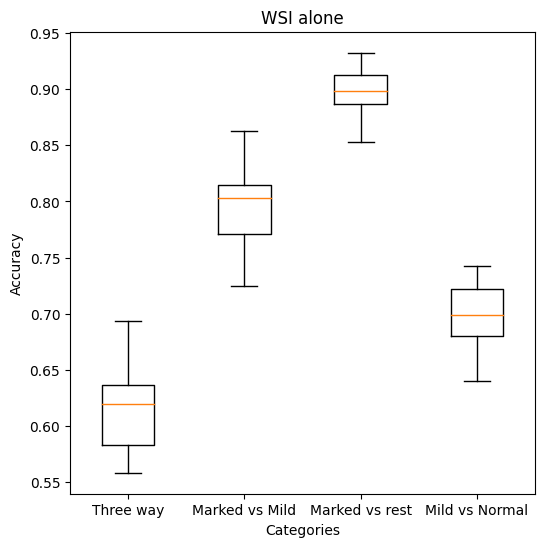

In [30]:

file_mm ="results/mildvmarked_image_only_resnet/task_1_tumor_vs_normal_CLAM_50_s1/summary.csv"
file_mo ="results/severeother_image/task_1_tumor_vs_normal_CLAM_50_s1/summary.csv"
file_mmo="results/results50/threeway_image_only/task_2_tumor_subtyping_CLAM_50_s1/summary.csv"
file_mn ="results/mildvnormal_image_only/task_1_tumor_vs_normal_CLAM_50_s1/summary.csv"

fig,ax=three_config_boxplot(file_mm,file_mo,file_mmo,file_mn,"test_acc",'different_wsi_acc.svg',"WSI alone")

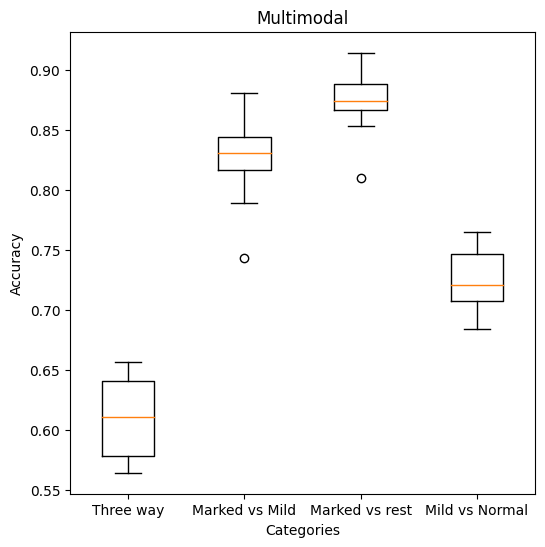

In [31]:

file_mm ="results/mildvmarked_concat_post_resnet/task_1_tumor_vs_normal_CLAM_50_s1/summary.csv"
file_mo ="results/severother_concat_post/task_1_tumor_vs_normal_CLAM_50_s1/summary.csv"
file_mmo="results/results50/threeway_image_concat/task_2_tumor_subtyping_CLAM_50_s1/summary.csv"
file_mn ="results/mildvnormal_concat_post/task_1_tumor_vs_normal_CLAM_50_s1/summary.csv"

fig,ax=three_config_boxplot(file_mm,file_mo,file_mmo,file_mn,"test_acc",'different_cat_acc.svg',"Multimodal")

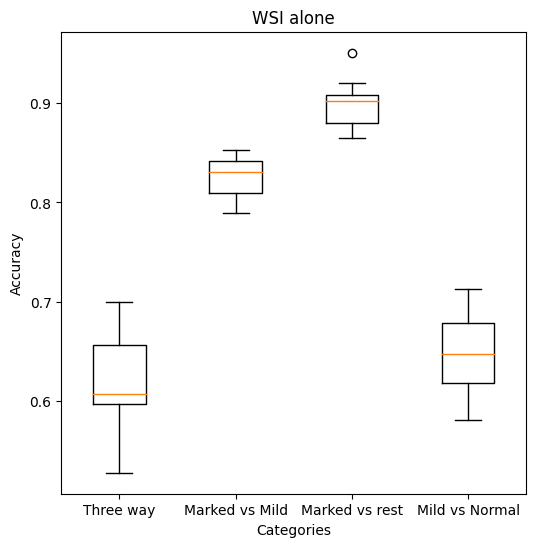

In [4]:

file_mm ="results/mil_mm_image_only/task_1_tumor_vs_normal_MIL_100_s1/summary.csv"
file_mo ="results/mil_so_image_only/task_1_tumor_vs_normal_MIL_100_s1/summary.csv"
file_mmo="results/mil_threew_image_only/task_2_tumor_subtyping_MIL_100_s1/summary.csv"
file_mn ="results/mil_mn_image_only/task_1_tumor_vs_normal_MIL_100_s1/summary.csv"

fig,ax=three_config_boxplot(file_mm,file_mo,file_mmo,file_mn,"test_acc",'baseline_different_wsi_acc.jpg',"WSI alone")

In [35]:
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()

def compare_boxplot(clam_mm, clam_mo,clam_mmo,clam_mn,mil_mm,mil_mo,mil_mmo,mil_mn,metric,fig_name,title):
    clam_mm = pd.read_csv(clam_mm)[metric].to_numpy()
    clam_mo = pd.read_csv(clam_mo)[metric].to_numpy()
    clam_mmo = pd.read_csv(clam_mmo)[metric].to_numpy()
    clam_mn = pd.read_csv(clam_mn)[metric].to_numpy()

    ticks = ["Three way","Marked vs Mild","Marked vs rest","Mild vs Normal"]
    mil_mm = pd.read_csv(mil_mm)[metric].to_numpy()
    mil_mo = pd.read_csv(mil_mo)[metric].to_numpy()
    mil_mmo = pd.read_csv(mil_mmo)[metric].to_numpy()
    mil_mn = pd.read_csv(mil_mn)[metric].to_numpy()
    clam_data = [clam_mmo,clam_mm, clam_mo, clam_mn]
    mil_data =[mil_mmo,mil_mm, mil_mo,mil_mn]
    clam_plot = plt.boxplot(clam_data,positions=np.array(np.arange(len(clam_data)))*2.0-0.35, widths=0.6)
    mil_plot = plt.boxplot(mil_data,positions=np.array(np.arange(len(mil_data)))*2.0+0.35, widths=0.6)
    
    define_box_properties(clam_plot, '#D7191C', 'CLAM')
    define_box_properties(mil_plot, '#2C7BB6', 'Naive MIL')
    plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
    plt.xlabel('Solar Elastosis Configurations')
    plt.ylabel('AUC')
    plt.title(title)
    plt.savefig(fig_name)

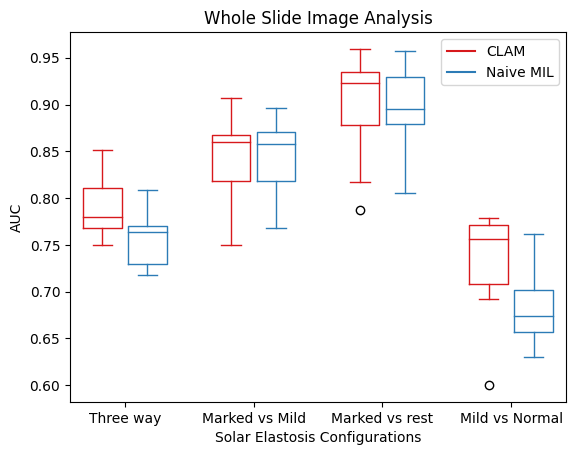

In [36]:
file_mm ="results/mildvmarked_image_only_resnet/task_1_tumor_vs_normal_CLAM_100_s1/summary.csv"
file_mo ="results/severeother_image/task_1_tumor_vs_normal_CLAM_100_s1/summary.csv"
file_mmo="results/threeway_image_only/task_2_tumor_subtyping_CLAM_100_s1/summary.csv"
file_mn ="results/mildvnormal_image_only/task_1_tumor_vs_normal_CLAM_50_s1/summary.csv"

mil_mm ="results/mil_mm_image_only/task_1_tumor_vs_normal_MIL_100_s1/summary.csv"
mil_mo ="results/mil_so_image_only/task_1_tumor_vs_normal_MIL_100_s1/summary.csv"
mil_mmo="results/mil_threew_image_only/task_2_tumor_subtyping_MIL_100_s1/summary.csv"
mil_mn ="results/mil_mn_image_only/task_1_tumor_vs_normal_MIL_100_s1/summary.csv"

compare_boxplot(file_mm,file_mo,file_mmo,file_mn,mil_mm,mil_mo,mil_mmo,mil_mn,"test_auc",'compare_wsi_auc.svg',"Whole Slide Image Analysis")

In [15]:
def attention_boxplot(file_name,fig_name,title):
    print(pd.read_csv(file_name))
    attn_marked= pd.read_csv(file_name)["MarkedHA"].to_numpy()
    attn_mild= pd.read_csv(file_name)["MildHA"].to_numpy()
    x = ["Marked Solar Elastosis","Mild Solar Elastosis"]
    data = [ attn_marked, attn_mild]
    fig = plt.figure(figsize=[6, 6])
    ax = fig.add_subplot(111)
    ax.boxplot(data)
    ax.set_xticklabels(x)
    ax.set_title(title)
    ax.set_xlabel("Solar Elastosis Categories")
    ax.set_ylabel("High Attention Scores")
    plt.show()
    fig.savefig(fig_name)


    MarkedHA    MildHA
0   0.792492  0.369275
1   0.670917  0.445249
2   0.908254  0.891455
3   0.609642  0.328634
4   0.736209  0.917624
5   0.698473  0.701961
6   0.737015  0.555304
7   0.578164  0.704249
8   0.837064  0.568074
9   0.938837  0.987580
10  0.936234  0.440242
11  0.856049  0.316197
12  0.739349  0.950650
13  0.898919  0.508346
14  0.891233  0.838670
15  0.879409  0.492833
16  0.690752  0.541093
17  0.779485  0.524189
18  0.812348  0.546207
19  0.891321  0.888467
20  0.693862  0.490107
21  0.568902  0.338625
22  0.908644  0.649488
23  0.913675  0.369538
24  0.721995  0.461260
25  0.763422  0.605597
26  0.912236  0.550255
27  0.873328  0.778986
28  0.656984  0.578319
29  0.605879  0.631982
30  0.938437  0.697725
31  0.808178  0.733357
32  0.857237  0.730427


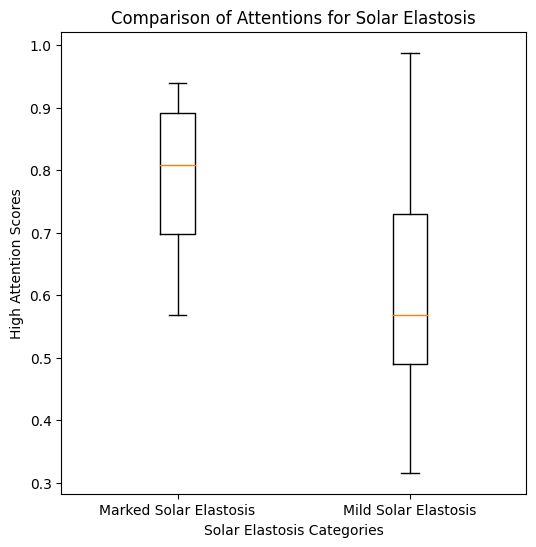

In [16]:
file_name ="box_plot.csv"
attention_boxplot(file_name, 'attention_box.jpg', 'Comparison of Attentions for Solar Elastosis')

In [17]:
import scipy.stats as stats

In [19]:
attn_marked= pd.read_csv(file_name)["MarkedHA"].to_numpy()
attn_mild= pd.read_csv(file_name)["MildHA"].to_numpy()
res=stats.wilcoxon(attn_marked, attn_mild)

In [20]:
print(res)

WilcoxonResult(statistic=52.0, pvalue=9.082956239581108e-06)
